<a href="https://colab.research.google.com/github/AparnaR12/Automated-review-rating-system/blob/main/notebooks/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import pandas

In [ ]:
import pandas as pd

Load data

In [ ]:
df=pd.read_csv('/content/amazon_review.csv')

View data

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4,Four Stars,1406073600,7/23/2014,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5,MOAR SPACE!!!,1382659200,10/25/2013,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4,nothing to really say....,1356220800,12/23/2012,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5,Great buy at this price!!! *** UPDATE,1384992000,11/21/2013,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5,best deal around,1373673600,7/13/2013,513,0,0


In [ ]:
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",I bought this Sandisk 16GB Class 10 to use wit...,1,Do not waste your money.,1374537600,7/23/2013,503,0,0
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",Used this for extending the capabilities of my...,5,Great item!,1377129600,8/22/2013,473,0,0
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",Great card that is very fast and reliable. It ...,5,Fast and reliable memory card,1396224000,3/31/2014,252,0,0
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",Good amount of space for the stuff I want to d...,5,Great little card,1379289600,9/16/2013,448,0,0
4914,A8KGFTFQ86IBR,B007WTAJTO,Zza,"[0, 0]",I've heard bad things about this 64gb Micro SD...,5,So far so good.,1388620800,2/1/2014,310,0,0


In [ ]:
df.sample()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
54,A1M1BDJBIS2KUJ,B007WTAJTO,a_compulsive_reader,"[0, 0]","Liked the first one I purchased so much, I bou...",5,"Fast, reliable, compatible, buy it direct from...",1385164800,11/23/2013,380,0,0


Inspect Structure

In [ ]:
df.shape

(4915, 12)

In [ ]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'day_diff',
       'helpful_yes', 'total_vote'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      4915 non-null   object
 1   asin            4915 non-null   object
 2   reviewerName    4914 non-null   object
 3   helpful         4915 non-null   object
 4   reviewText      4914 non-null   object
 5   overall         4915 non-null   int64 
 6   summary         4915 non-null   object
 7   unixReviewTime  4915 non-null   int64 
 8   reviewTime      4915 non-null   object
 9   day_diff        4915 non-null   int64 
 10  helpful_yes     4915 non-null   int64 
 11  total_vote      4915 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 460.9+ KB


In [ ]:
df.describe()

,overall,unixReviewTime,day_diff,helpful_yes,total_vote
count,4915.000000,4.915000e+03,4915.000000,4915.000000,4915.000000
mean,4.587589,1.379465e+09,437.367040,1.311089,1.521465
std,0.996845,1.581857e+07,209.439871,41.619161,44.123095
min,1.000000,1.339200e+09,1.000000,0.000000,0.000000
25%,5.000000,1.365898e+09,281.000000,0.000000,0.000000
50%,5.000000,1.381277e+09,431.000000,0.000000,0.000000
75%,5.000000,1.392163e+09,601.000000,0.000000,0.000000
max,5.000000,1.406074e+09,1064.000000,1952.000000,2020.000000


Handling Missing Data

In [ ]:
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,1
helpful,0
reviewText,1
overall,0
summary,0
unixReviewTime,0
reviewTime,0
day_diff,0


In [ ]:
df.dropna(inplace=True)

Removing duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

Removing unnecessary columns and rows

In [ ]:
df.drop(['reviewerID','asin','reviewerName','helpful','summary','unixReviewTime','reviewTime','day_diff','helpful_yes','total_vote'], axis=1, inplace=True)

In [ ]:
df.head()

,reviewText,overall
1,"Purchased this for my device, it worked as adv...",5
2,it works as expected. I should have sprung for...,4
3,This think has worked out great.Had a diff. br...,5
4,"Bought it with Retail Packaging, arrived legit...",5
5,It's mini storage. It doesn't do anything els...,5


Checking duplicate reviews

In [ ]:
duplicate_count = df.duplicated(subset='reviewText').sum()
print(f"Number of duplicate reviews: {duplicate_count}")

Number of duplicate reviews: 1


Remove duplicate reviews

In [ ]:
df= df.drop_duplicates(subset='reviewText', keep='first')

Sorting

In [ ]:
df.sort_values(by='overall', ascending=True)

,reviewText,overall
32,"I bought 2 of those SanDisk 32 GB microSD , us...",1
4910,I bought this Sandisk 16GB Class 10 to use wit...,1
1176,i still own it but card went bad after 2 weeks...,1
1139,"With all the great reviews on this card, I pic...",1
1131,Got this product and it was fine until it just...,1
...,...,...
21,Works great in a Samsung Galaxy S3. Formatted...,5
20,Works as expected. High transfer speed. Nice...,5
19,This works with the NL1520. No video stutteri...,5
18,The read and write speeds are better than the ...,5


Rename columns

In [ ]:
df.rename(columns={'overall': 'Rating'}, inplace=True)
df.rename(columns={'reviewText': 'Reviews'}, inplace=True)

Rating count

In [ ]:
rating_counts = df['Rating'].value_counts().sort_index()
print(rating_counts)

Rating
1     244
2      80
3     142
4     525
5    3921
Name: count, dtype: int64


Reset index for cleaner dataframes

In [ ]:
df.reset_index(drop=True, inplace=True)

Save cleaned data

In [ ]:
df.to_csv('/content/cleaned_data.csv', index=False)

Load data

In [ ]:
df3 = pd.read_csv('/content/Food_reviews.csv', on_bad_lines='skip',engine='python')

In [ ]:
df3.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Dropping columns

In [ ]:
df3 = df3.drop(["Id", "ProductId", "UserId","ProfileName","HelpfulnessDenominator","HelpfulnessNumerator","Time","Summary"], axis=1)

In [ ]:
df3.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


Renaming columns

In [ ]:
df3 = df3[["Score", "Text"]]
df3 = df3.rename(columns={"Text": "Reviews", "Score": "Rating"})

Merged dataset

In [ ]:
df2 = pd.read_csv(
    "/content/am_reviews.csv",
    sep=",",
    quotechar='"',
    encoding="utf-8",
    engine="python",
    on_bad_lines="skip"
)
df2.head()

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...",16-Sep-24
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,16-Sep-24
2,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,16-Sep-24
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,17-Sep-24
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,16-Sep-24


Load dataset

In [ ]:
import pandas as pd

# Load dataset 1
df1 = pd.read_csv("/content/cleaned_data.csv")

# Load dataset 2
df2 = pd.read_csv(
    "/content/am_reviews.csv",
    sep=",",
    quotechar='"',
    encoding="utf-8",
    engine="python",
    on_bad_lines="skip"
)
df2 = df2[["Review Text", "Rating"]]  # Keep only relevant columns
df2 = df2.rename(columns={"Review Text": "Reviews", "Rating": "Rating"})

# Merge all three
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

print("Final merged dataset shape:", merged_df.shape)
print(merged_df.head())

Final merged dataset shape: (166787, 2)
                                             Reviews Rating
0  Purchased this for my device, it worked as adv...      5
1  it works as expected. I should have sprung for...      4
2  This think has worked out great.Had a diff. br...      5
3  Bought it with Retail Packaging, arrived legit...      5
4  It's mini storage.  It doesn't do anything els...      5


View data

In [ ]:
merged_df.head()

,Reviews,Rating
0,"Purchased this for my device, it worked as adv...",5
1,it works as expected. I should have sprung for...,4
2,This think has worked out great.Had a diff. br...,5
3,"Bought it with Retail Packaging, arrived legit...",5
4,It's mini storage. It doesn't do anything els...,5


In [ ]:
merged_df.tail()

,Reviews,Rating
166782,I had been looking for popcorn salt for awhile...,5
166783,My husband still makes popcorn the old fashion...,5
166784,And I'm a huge fan of Diamond Crystal products...,5
166785,The fine grind of the salt is perfect for popc...,5
166786,I admit to being a saltaholic and this is my f...,4


Inspect structure

In [ ]:
merged_df.shape

(166787, 2)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166787 entries, 0 to 166786
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Reviews  166628 non-null  object
 1   Rating   166628 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [ ]:
merged_df.describe()

,Reviews,Rating
count,166628,166628
unique,145998,10
top,Review text not found,5
freq,630,92402


Handling missing data

In [ ]:
merged_df.isnull().sum()

,0
Reviews,159
Rating,159


In [ ]:
merged_df.dropna(inplace=True)

Removing duplicates

In [ ]:
merged_df.duplicated().sum()

np.int64(20603)

In [ ]:
merged_df.drop_duplicates(inplace=True)

Nan values removal

In [ ]:
# Drop rows where Rating is NaN
merged_df = merged_df.dropna(subset=['Rating'])

# Reset index after dropping
merged_df = merged_df.reset_index(drop=True)

# Check new shape
print(f"Dataset after dropping NaN ratings: {merged_df.shape}")

Dataset after dropping NaN ratings: (146025, 2)


converting string to numeric

In [ ]:
# Convert Rating column
merged_df['Rating'] = merged_df['Rating'].astype(str).str.extract(r'(\d+)').astype(float)

print(merged_df.head())
print(merged_df.tail())

                                             Reviews  Rating
0  Purchased this for my device, it worked as adv...     5.0
1  it works as expected. I should have sprung for...     4.0
2  This think has worked out great.Had a diff. br...     5.0
3  Bought it with Retail Packaging, arrived legit...     5.0
4  It's mini storage.  It doesn't do anything els...     5.0
                                                  Reviews  Rating
146020  I had been looking for popcorn salt for awhile...     5.0
146021  My husband still makes popcorn the old fashion...     5.0
146022  And I'm a huge fan of Diamond Crystal products...     5.0
146023  The fine grind of the salt is perfect for popc...     5.0
146024  I admit to being a saltaholic and this is my f...     4.0


In [ ]:
merged_df['Rating'] = merged_df['Rating'].astype(int)

In [ ]:
rating_counts = merged_df['Rating'].value_counts().sort_index()
print(rating_counts)

Rating
1    24384
2     7900
3    10580
4    19448
5    83713
Name: count, dtype: int64


Removal of exact duplicates (same rate and review)


In [ ]:
exact_duplicates = merged_df[merged_df.duplicated(subset=['Reviews','Rating'], keep=False)]
print(exact_duplicates)

Empty DataFrame
Columns: [Reviews, Rating]
Index: []


Removal of conflicting ratings (same text different ratings)

In [ ]:
# Find reviews that have conflicting ratings
conflicting_reviews = merged_df[merged_df.duplicated(subset=['Reviews'], keep=False)]
conflicting_reviews = conflicting_reviews.groupby('Reviews').filter(lambda x: len(x['Rating'].unique()) > 1)
print(conflicting_reviews)

                                                  Reviews  Rating
5088                                Review text not found       1
5099                                Review text not found       2
5108                                Review text not found       4
5340                                Review text not found       5
5494                                Review text not found       3
8905    Lowest price on-line. Free shipping. Delivery ...       4
21159                           Very good online shopping       2
21160                           Very good online shopping       4
21557   Worst experience on online shopping ever!! Ama...       3
21559   Worst experience on online shopping ever!! Ama...       1
21741                                        good company       5
25115                                        good company       4
25319   Lowest price on-line. Free shipping. Delivery ...       5
30239   Buffalo Bills Premium Snacks<br /><br />I real...       3
30334   Go

In [ ]:
merged_df['review_length'] = merged_df['Reviews'].str.len()

# View the first few rows
print(merged_df[['Reviews', 'review_length']].head())

                                             Reviews  review_length
0  Purchased this for my device, it worked as adv...            158
1  it works as expected. I should have sprung for...            166
2  This think has worked out great.Had a diff. br...            340
3  Bought it with Retail Packaging, arrived legit...            290
4  It's mini storage.  It doesn't do anything els...            282


Ratings count

In [ ]:
# Count each rating
rating_counts = merged_df['Rating'].value_counts().sort_index()

print(rating_counts)

Rating
1    24384
2     7900
3    10580
4    19448
5    83713
Name: count, dtype: int64


Data Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords, wordnet as wn
from nltk import pos_tag

# Tagger name changed in newer NLTK; try both
try:
    nltk.download('averaged_perceptron_tagger', quiet=True)
except:
    pass
try:
    nltk.download('averaged_perceptron_tagger_eng', quiet=True)
except:
    pass

# Lemmatization
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def _to_wn_pos(tag: str):
    """Map NLTK POS tags to WordNet POS tags."""
    if tag.startswith('J'):
        return wn.ADJ
    if tag.startswith('V'):
        return wn.VERB
    if tag.startswith('N'):
        return wn.NOUN
    if tag.startswith('R'):
        return wn.ADV
    return wn.NOUN  # fallback

# Text cleaning and normalization
def clean_review(text):
    if not isinstance(text, str):
        return ""

import re

def clean_text(text):
    text = text.strip()
    if len(text) < 6 or not re.search(r"[a-zA-Z]", text):
        return None  # mark as invalid
    return text

    # Lowercase
    text = text.lower()

    # Remove URLs, HTML, punctuation, numbers, extra spaces
    text = re.sub(r"http\S+|www\S+|https\S+", " ", text)
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"[^\w\s]", " ", text)  # punctuation
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    # Remove emojis (common ranges)
    emoji_pattern = re.compile(
        "[" +
        "\U0001F600-\U0001F64F" +  # emoticons
        "\U0001F300-\U0001F5FF" +  # symbols & pictographs
        "\U0001F680-\U0001F6FF" +  # transport & map symbols
        "\U0001F1E0-\U0001F1FF" +  # flags
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub("", text)

    # Tokenize (simple split is fine after cleanup)
    tokens = [w for w in text.split() if w not in stop_words]
    if not tokens:
        return ""

    # POS-tag and lemmatize with correct POS
    tagged = pos_tag(tokens)
    lemmas = [lemmatizer.lemmatize(w, _to_wn_pos(t)) for w, t in tagged]

    # Optional: filter out very short/very long reviews
    if len(lemmas) < 3 or len(lemmas) > 200:
        return ""

    return " ".join(lemmas)

# ✅ Clean the existing 'Reviews' column directly
merged_df['Reviews'] = merged_df['Reviews'].astype(str).apply(clean_review)

# ✅ Remove empty reviews (those filtered out)
merged_df = merged_df[merged_df['Reviews'].str.strip() != ""]

print("Remaining reviews after cleaning and filtering:", len(merged_df))

Remaining reviews after cleaning and filtering: 144471


In [ ]:
from nltk.corpus import stopwords

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Print total number and the stopwords themselves
print(f"Total stopwords: {len(stop_words)}\n")
print("Stopwords list:\n")
print(sorted(stop_words))

Total stopwords: 198

Stopwords list:

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'r

In [ ]:
merged_df.to_csv('/content/Completecleaned_data.csv', index=False)

In [ ]:
merged_df.shape

(144471, 3)

In [ ]:
merged_df.head()

,Reviews,Rating,review_length
0,purchase device work advertised never much pho...,5,158
1,work expect sprung high capacity think make bi...,4,166
2,think work great diff bran gb card go south mo...,5,340
3,buy retail packaging arrive legit orange envel...,5,290
4,mini storage anything else suppose purchase ad...,5,282


In [ ]:
merged_df.head()

,Reviews,Rating,review_length
0,purchase device work advertised never much pho...,5,158
1,work expect sprung high capacity think make bi...,4,166
2,think work great diff bran gb card go south mo...,5,340
3,buy retail packaging arrive legit orange envel...,5,290
4,mini storage anything else suppose purchase ad...,5,282


Balancing datasets

In [ ]:
from sklearn.utils import resample
import pandas as pd

# Ensure Rating column is numeric
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')
merged_df = merged_df.dropna(subset=['Rating'])
merged_df['Rating'] = merged_df['Rating'].astype(int)

# Show class distribution before balancing
print("Before balancing:")
print(merged_df['Rating'].value_counts())

# Define desired number of samples per class
samples_per_class = 2000

# Balance dataset by sampling equal number of reviews for each rating
balanced_df = (
    merged_df.groupby('Rating', group_keys=False)
    .apply(lambda x: x.sample(n=min(len(x), samples_per_class), random_state=42))
    .reset_index(drop=True)
)

# Show results
print("\nAfter balancing:")
print(balanced_df['Rating'].value_counts())
print("Balanced dataset shape:", balanced_df.shape)


Before balancing:
Rating
5    83022
1    24007
4    19198
3    10441
2     7803
Name: count, dtype: int64

After balancing:
Rating
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64
Balanced dataset shape: (10000, 3)


/tmp/ipython-input-1955334307.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(len(x), samples_per_class), random_state=42))


**Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Bar chart**


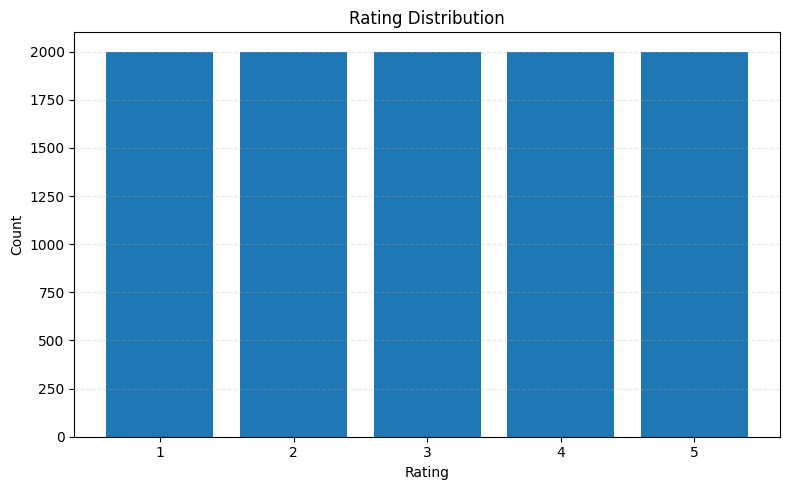

In [ ]:
plt.figure(figsize=(8,5))
rating_counts = balanced_df["Rating"].value_counts().sort_index()
plt.bar(rating_counts.index.astype(str), rating_counts.values)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

**Histogram**

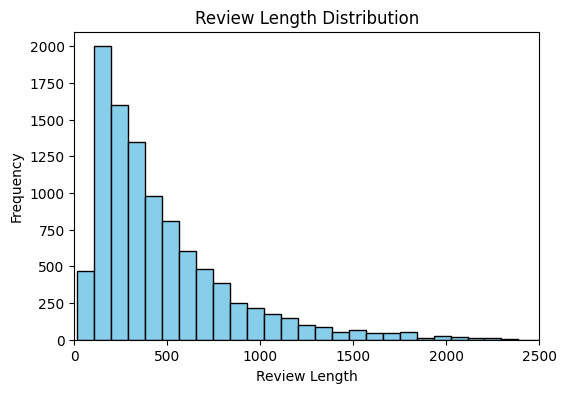

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(balanced_df['review_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.xlim(0, 2500)
plt.ylabel('Frequency')
plt.show()

**Boxplot**

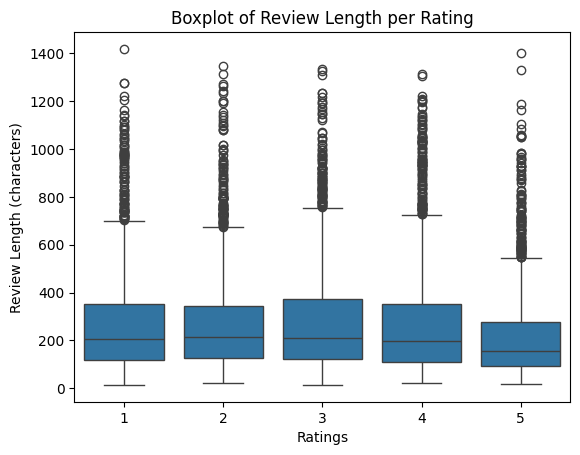

In [ ]:
review_lengths = balanced_df['Reviews'].astype(str).apply(len)
sns.boxplot(x=balanced_df['Rating'], y=review_lengths)
plt.xlabel("Ratings")
plt.ylabel("Review Length (characters)")
plt.title("Boxplot of Review Length per Rating")
plt.show()

**Violin Plot**

/tmp/ipython-input-3521188022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating', y='review_length', data=balanced_df, palette='magma')


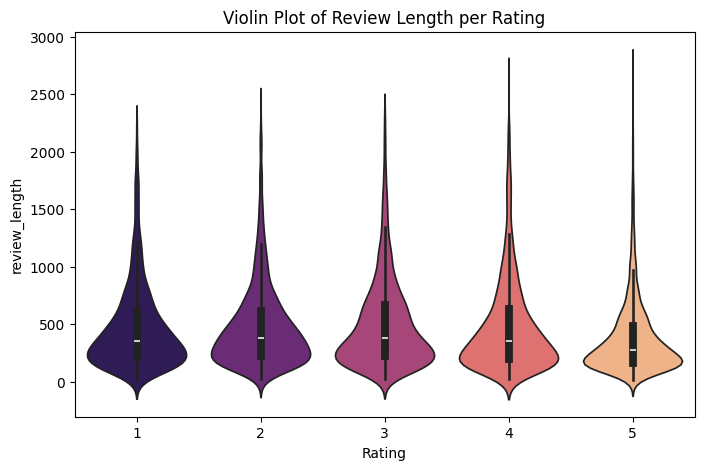

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Rating', y='review_length', data=balanced_df, palette='magma')
plt.title('Violin Plot of Review Length per Rating')
plt.show()

**Word Frequency** (Top words per class)

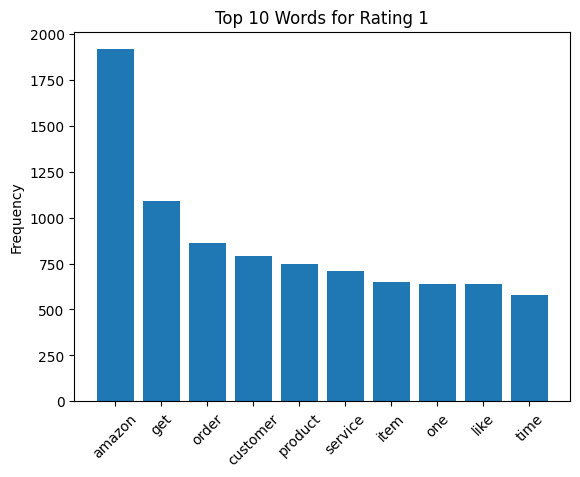

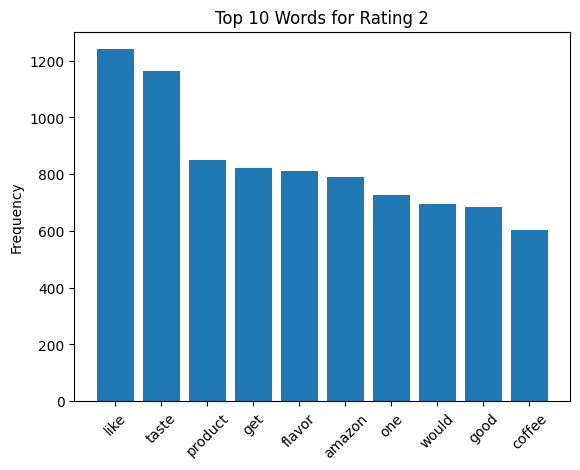

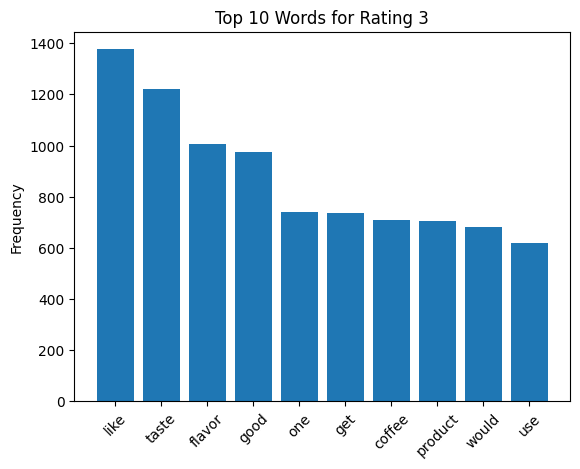

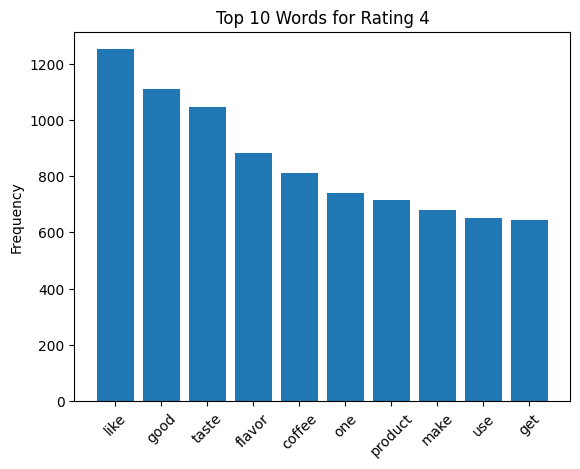

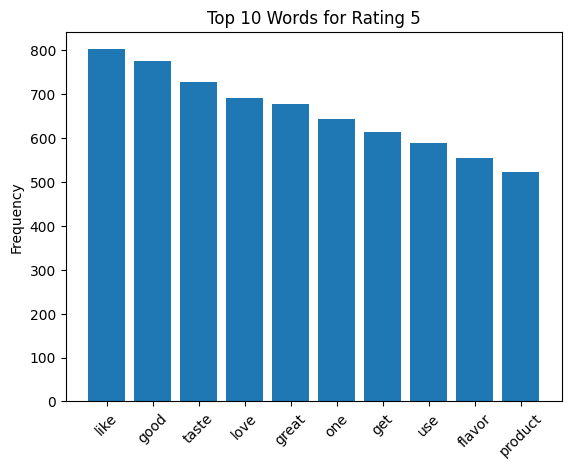

In [ ]:
from collections import Counter
import re
import matplotlib.pyplot as plt

# Loop through each rating
for rating in sorted(balanced_df['Rating'].unique()):
    # Get all reviews for this rating
    reviews_text = " ".join(balanced_df[balanced_df['Rating'] == rating]['Reviews'].dropna().tolist())

    # Clean text
    reviews_text = re.sub(r'[^a-zA-Z\s]', '', reviews_text.lower())

    # Split into words
    words = reviews_text.split()

    # Count top 10 words
    top_words = Counter(words).most_common(10)

    # --- Plot ---
    words_list, counts = zip(*top_words)
    plt.bar(words_list, counts)
    plt.xticks(rotation=45)
    plt.title(f"Top 10 Words for Rating {rating}")
    plt.ylabel("Frequency")
    plt.show()


Display 3-10 ratings per review

In [ ]:
for rating in sorted(balanced_df["Rating"].unique()):
    print(f"\n--- Rating {rating} ---")
    samples = balanced_df[balanced_df["Rating"] == rating]["Reviews"].sample(n=5, random_state=42)
    for i, review in enumerate(samples, 1):
        print(f"{i}. {review}")


--- Rating 1 ---
1. amazon seller everything proof item still amazon attitude accept proof seller also jealous account top first time amazon make thing difficult
2. use thing deliver every house mine order cancel apparent reason really misleading description good
3. live ireland order amazon uk always slow despatch normally take week send stock give false delivery date always track parcel never anywhere near u suppose delivery date send quicker stop lying
4. awful company consistently ship incorrect defective product unable resolve issue contact person even cancel account bad company planet would rather shop twenty different website stuff need rip break robot anymore
5. amason prime member get tedious rug pull stream content pay free prime member late delivery day even though opted next day prime delivery earlier delivery week find harder justify money im pay pathetic service seriously consider cancel sue breach contract basos think im pay extra leave

--- Rating 2 ---
1. read review 

Imbalanced Dataset

In [ ]:
import pandas as pd

df_remaining = merged_df.merge(
    balanced_df[['Rating', 'Reviews']],
    on=['Rating', 'Reviews'],
    how='left',
    indicator=True
)

df_remaining = (
    df_remaining[df_remaining['_merge'] == 'left_only']
    .drop(columns=['_merge'])
    .reset_index(drop=True)
)

print("Remaining dataset shape after removing balanced:", df_remaining.shape)

# Desired ratios for each rating
ratios = {
    1: 0.10,  # 10%
    2: 0.15,  # 15%
    3: 0.25,  # 25%
    4: 0.30,  # 30%
    5: 0.20   # 20%
}

# ✅ Set total size of unbalanced dataset
total_unbalanced = 10000
unbalanced_df_list = []

for rating, ratio in ratios.items():
    df_rating = df_remaining[df_remaining['Rating'] == rating]
    sample_size = int(total_unbalanced * ratio)

    # Handle cases where not enough samples are available
    if len(df_rating) >= sample_size:
        df_sampled = df_rating.sample(sample_size, random_state=42)
    else:
        print(f" Only {len(df_rating)} samples available for rating {rating}, expected {sample_size}. Taking all available.")
        df_sampled = df_rating

    unbalanced_df_list.append(df_sampled)

df_unbalanced = pd.concat(unbalanced_df_list).reset_index(drop=True)

# Shuffle to mix the samples well
df_unbalanced = df_unbalanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("✅ Final unbalanced dataset shape:", df_unbalanced.shape)
print("\n Rating distribution (%):")
print(df_unbalanced['Rating'].value_counts(normalize=True) * 100)


Remaining dataset shape after removing balanced: (134458, 3)
✅ Final unbalanced dataset shape: (10000, 3)

 Rating distribution (%):
Rating
4    30.0
3    25.0
5    20.0
2    15.0
1    10.0
Name: proportion, dtype: float64


In [ ]:
df_unbalanced.shape

(10000, 3)

Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Bar Chart

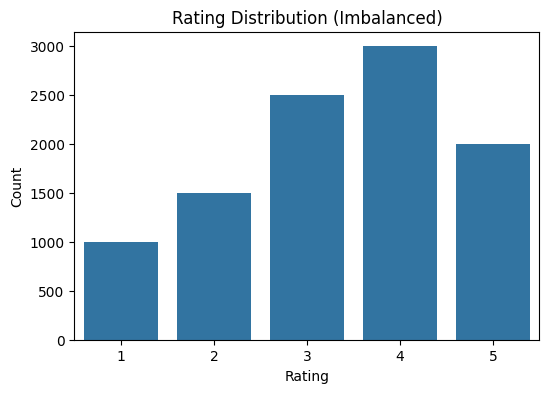

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Rating", data=df_unbalanced, order=sorted(df_unbalanced["Rating"].unique()))
plt.title("Rating Distribution (Imbalanced)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Histogram

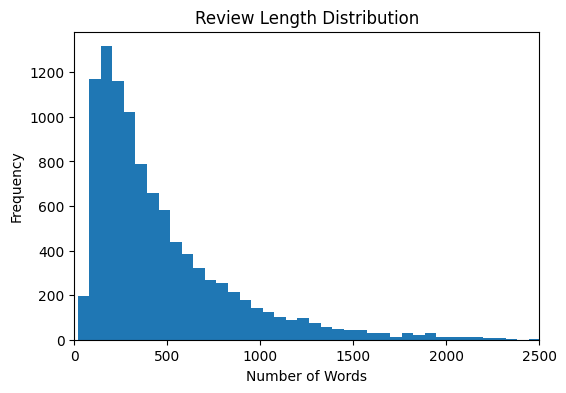

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df_unbalanced["review_length"], bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.xlim(0, 2500)
plt.ylabel("Frequency")
plt.show()

Boxplot

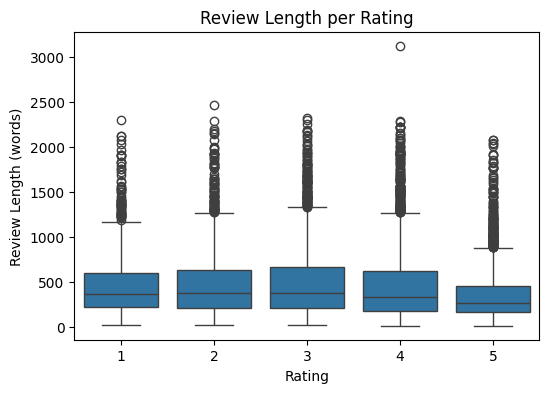

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Rating", y="review_length", data=df_unbalanced)
plt.title("Review Length per Rating")
plt.xlabel("Rating")
plt.ylabel("Review Length (words)")
plt.show()

Violin Plot

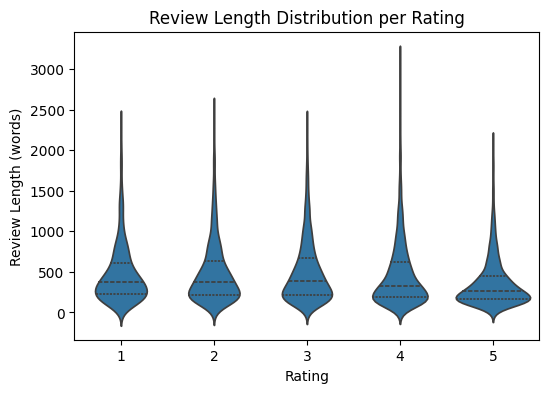

In [ ]:
plt.figure(figsize=(6,4))
sns.violinplot(x="Rating", y="review_length", data=df_unbalanced, inner="quartile")
plt.title("Review Length Distribution per Rating")
plt.xlabel("Rating")
plt.ylabel("Review Length (words)")
plt.show()

Word Frequency Top words per class

In [ ]:
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

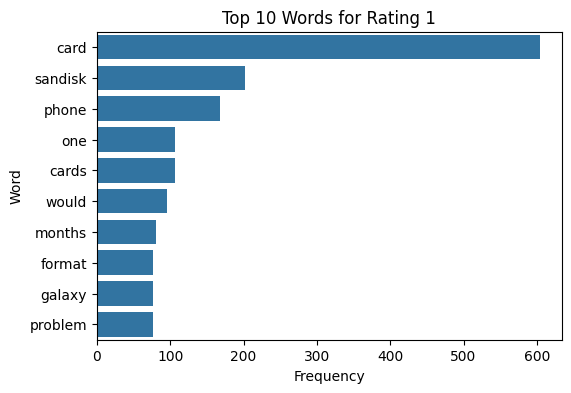

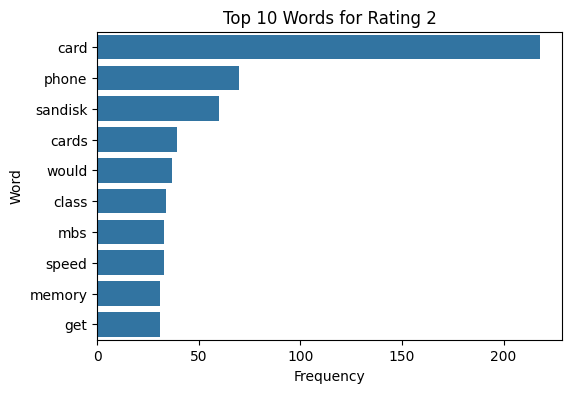

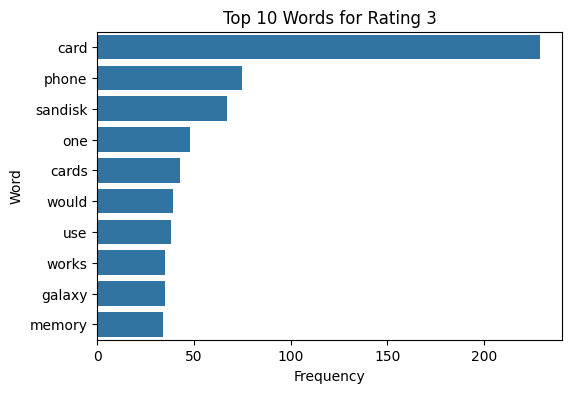

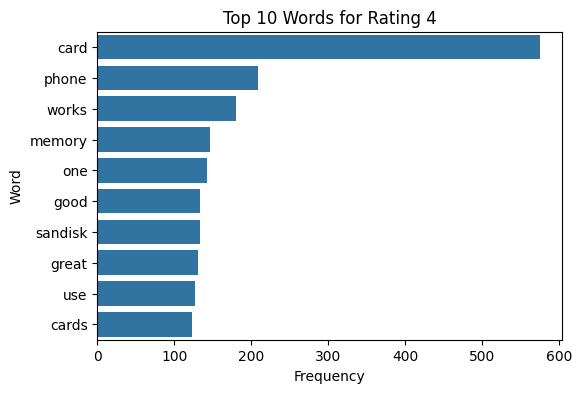

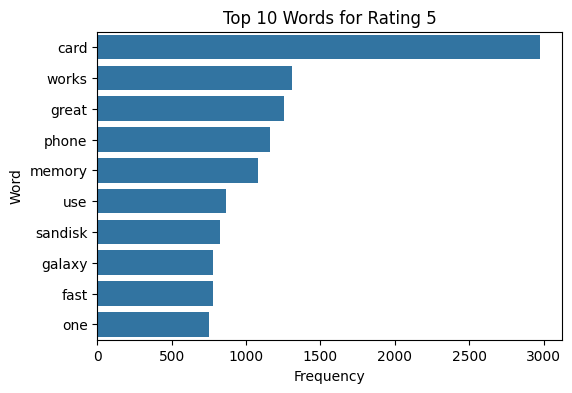

In [ ]:
# Run once
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())
    return [w for w in text.split() if w not in stop_words and len(w) > 2]

top_n = 10
for rating in sorted(df["Rating"].unique()):
    words = df[df["Rating"] == rating]["Reviews"].astype(str).apply(preprocess).sum()
    freq = Counter(words).most_common(top_n)
    words_, counts = zip(*freq)

    plt.figure(figsize=(6,4))
    sns.barplot(x=list(counts), y=list(words_))
    plt.title(f"Top {top_n} Words for Rating {rating}")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.show()


Display 3-10 reviews per rating

In [ ]:
for rating in sorted(df_unbalanced["Rating"].unique()):
    print(f"\n--- Rating {rating} ---")
    samples = df_unbalanced[df_unbalanced["Rating"] == rating]["Reviews"].sample(n=5, random_state=42)
    for i, review in enumerate(samples, 1):
        print(f"{i}. {review}")


--- Rating 1 ---
1. amazon bad thing ever encounter blocked order provide bunch document screenshot bank app show card number bunch card account statement copy passport even twice completely blocked account enough understand actually make payment card recruit moron employee amazon account closedthe information provide insufficient verify payment ownership pending order cancel believe error please contact amazon customer service
2. enjoy syrup hate constant increase get reeeally feed corporate greed country
3. person india need know treat customer instead go superior amazon fault agent priyanka bad ego fit inside chatbox learn c apply cs job
4. hop find delicious new low carb snack well miss mark delicious mile extremely salty chewy hop find way salvage anyone suggestion ear
5. disgust customer care rude unhelpful unprofessional keep refuse answer question chat feel would look bad end chat end still type awful people

--- Rating 2 ---
1. gum stick teeth flavor last long ok vending mach

In [ ]:
# Remove the 'review_length' column
balanced_df = balanced_df.drop(columns=['review_length'])

# Optional: check the result
print(balanced_df.head())

                                             Reviews  Rating
0  smoked salmon absolutely disgust box neat also...       1
1  may unfair rate one star something noticed bef...       1
2  cat like waste money ya surprise see horse bed...       1
3  tried load movie amazon prime get message put ...       1
4  first time get everything great second time ho...       1


Balanced Train Test split

In [ ]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data
X_bal = balanced_df["Reviews"]
y_bal = balanced_df["Rating"]

X_train_bal_raw, X_test_bal_raw, y_train_bal_raw, y_test_bal_raw = train_test_split(
    X_bal, y_bal,
    test_size=0.2,
    random_state=42,
    stratify=y_bal
)

# --- Clean training and testing reviews ---
X_train_cleaned = X_train_bal_raw.apply(clean_review)
X_test_cleaned = X_test_bal_raw.apply(clean_review)

# --- Keep only valid (non-empty) rows ---
train_valid = X_train_cleaned.notna()
test_valid = X_test_cleaned.notna()

# --- Filter y accordingly (same valid indices) ---
X_train_bal = X_train_cleaned[train_valid].reset_index(drop=True)
y_train_bal = y_train_bal_raw[train_valid].reset_index(drop=True)

X_test_bal = X_test_cleaned[test_valid].reset_index(drop=True)
y_test_bal = y_test_bal_raw[test_valid].reset_index(drop=True)

# --- TF-IDF Vectorizer ---
vectorizer_bal = TfidfVectorizer(
    max_features=20000,      # more features → better coverage
    ngram_range=(1, 3),      # 1-gram, 2-gram, and 3-gram
    sublinear_tf=True,       # scales tf values
    stop_words='english'     # removes common English words
)

X_train_bal_vec = vectorizer_bal.fit_transform(X_train_bal)
X_test_bal_vec = vectorizer_bal.transform(X_test_bal)

# --- Save vectorizer ---
joblib.dump(vectorizer_bal, '/content/drive/MyDrive/balanced_split/vectorizer_bal.pkl')

# --- Display shapes ---
print("Shapes:")
print("X_train_vec:", X_train_bal_vec.shape)
print("X_test_vec:", X_test_bal_vec.shape)
print("y_train:", y_train_bal.shape)
print("y_test:", y_test_bal.shape)

Shapes:
X_train_vec: (8000, 20000)
X_test_vec: (2000, 20000)
y_train: (8000,)
y_test: (2000,)


Percentage

In [ ]:
# Total samples in balanced dataset
total_samples = len(balanced_df)

# Training and test sizes
train_size = len(X_train_bal)
test_size = len(X_test_bal)

print("Training set size:", train_size, f"({train_size/total_samples:.2%})")
print("Test set size:", test_size, f"({test_size/total_samples:.2%})")

Training set size: 8000 (80.00%)
Test set size: 2000 (20.00%)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import joblib

# Save features
pd.DataFrame(X_train_bal).to_csv('/content/X_train_bal.csv', index=False)
pd.DataFrame(X_test_bal).to_csv('/content/X_test_bal.csv', index=False)

# Save labels
pd.DataFrame(y_train_bal_raw).to_csv('/content/y_train_bal.csv', index=False)
pd.DataFrame(y_test_bal).to_csv('/content/y_test_bal.csv', index=False)

joblib.dump(X_train_bal_vec, '/content/X_train_bal_vec.pkl')
joblib.dump(X_test_bal_vec, '/content/X_test_bal_vec.pkl')

pd.DataFrame(balanced_df).to_csv('/content/balanced_df.csv', index=False)
# Save labels

In [ ]:
!mkdir -p /content/drive/MyDrive/balanced_split
!cp /content/X_train_bal.csv /content/drive/MyDrive/balanced_split/
!cp /content/X_test_bal.csv /content/drive/MyDrive/balanced_split/
!cp /content/y_train_bal.csv /content/drive/MyDrive/balanced_split/
!cp /content/y_test_bal.csv /content/drive/MyDrive/balanced_split/
!cp /content/X_train_bal_vec.pkl /content/drive/MyDrive/balanced_split/
!cp /content/X_test_bal_vec.pkl /content/drive/MyDrive/balanced_split/
!cp /content/balanced_df.csv /content/drive/MyDrive/

In [ ]:
# Remove the 'review_length' col
df_unbalanced = df_unbalanced.drop(columns=['review_length'])

# Optional: check the result
print(df_unbalanced.head())

                                             Reviews  Rating
0  anchor bar buffalo hot wing invent sauce captu...       4
1  great real cheap right use oz water much good ...       3
2  amazon ship gotten bad even amazon send email ...       2
3  st think order wrong size guess small size pre...       3
4  bit energy drink addict get hooked live japan ...       3


Train test split for unbalanced

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Step 1: Define desired ratios and total size ---
ratios = {
    1: 0.10,  # 10%
    2: 0.15,  # 15%
    3: 0.25,  # 25%
    4: 0.30,  # 30%
    5: 0.20   # 20%
}

total_samples = 10000
unbalanced_df_list = []

# --- Step 2: Sample according to ratios ---
for rating, ratio in ratios.items():
    df_rating = df_unbalanced[df_unbalanced['Rating'] == rating]
    sample_size = int(total_samples * ratio)

    if len(df_rating) >= sample_size:
        df_sampled = df_rating.sample(sample_size, random_state=42)
    else:
        # If fewer rows available, take all
        df_sampled = df_rating
        print(f"⚠️ Rating {rating} has only {len(df_rating)} samples, taking all available.")

    unbalanced_df_list.append(df_sampled)

# ✅ Final dataset name remains df_unbalanced
df_unbalanced = pd.concat(unbalanced_df_list).reset_index(drop=True)

print("✅ Sampled rating distribution:")
print(df_unbalanced['Rating'].value_counts())
print("Total samples:", len(df_unbalanced))

# --- Step 3: Train-Test Split (stratified) ---
X_unbal = df_unbalanced["Reviews"]
y_unbal = df_unbalanced["Rating"]

X_train_unbal_raw, X_test_unbal_raw, y_train_unbal_raw, y_test_unbal_raw = train_test_split(
    X_unbal, y_unbal,
    stratify=y_unbal,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# --- Step 4: Text cleaning ---
X_train_unbal = X_train_unbal_raw.apply(clean_review)
X_test_unbal = X_test_unbal_raw.apply(clean_review)

# Keep only valid (non-empty) rows
train_valid = X_train_unbal.notna()
test_valid = X_test_unbal.notna()

X_train_unbal = X_train_unbal[train_valid].reset_index(drop=True)
y_train_unbal = y_train_unbal_raw[train_valid].reset_index(drop=True)

X_test_unbal = X_test_unbal[test_valid].reset_index(drop=True)
y_test_unbal = y_test_unbal_raw[test_valid].reset_index(drop=True)

# --- Step 5: TF-IDF Vectorization ---
vectorizer_unbal = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1, 3),
    sublinear_tf=True,
    stop_words='english'
)

X_train_unbal_vec = vectorizer_unbal.fit_transform(X_train_unbal)
X_test_unbal_vec = vectorizer_unbal.transform(X_test_unbal)

# --- Step 6: Save vectorizer for reuse ---
joblib.dump(vectorizer_unbal, '/content/drive/MyDrive/unbalanced_split/vectorizer_unbal.pkl')

# --- Step 7: Final output ---
print("\n✅ Final Unbalanced Split Shapes:")
print("X_train_unbal_vec:", X_train_unbal_vec.shape)
print("X_test_unbal_vec:", X_test_unbal_vec.shape)
print("y_train_unbal:", y_train_unbal.shape)
print("y_test_unbal:", y_test_unbal.shape)


✅ Sampled rating distribution:
Rating
4    3000
3    2500
5    2000
2    1500
1    1000
Name: count, dtype: int64
Total samples: 10000

✅ Final Unbalanced Split Shapes:
X_train_unbal_vec: (8000, 20000)
X_test_unbal_vec: (2000, 20000)
y_train_unbal: (8000,)
y_test_unbal: (2000,)


Percentage of test and training set

In [ ]:
# Total samples in imbalanced dataset
total_samples = len(df_unbalanced)

# Training and test sizes
train_size = len(X_train_unbal)
test_size = len(X_test_unbal)

print("Training set size:", train_size, f"({train_size/total_samples:.2%})")
print("Test set size:", test_size, f"({test_size/total_samples:.2%})")

Training set size: 8000 (80.00%)
Test set size: 2000 (20.00%)


Saving to google drive

In [ ]:
import pandas as pd
import joblib

# Save features
pd.DataFrame(X_train_unbal).to_csv('/content/X_train_unbal.csv', index=False)
pd.DataFrame(X_test_unbal).to_csv('/content/X_test_unbal.csv', index=False)

# Save labels
pd.DataFrame(y_train_unbal).to_csv('/content/y_train_unbal.csv', index=False)
pd.DataFrame(y_test_unbal).to_csv('/content/y_test_unbal.csv', index=False)

# Save features
joblib.dump(X_train_unbal_vec,'/content/X_train_unbal_vec.pkl')
joblib.dump(X_test_unbal_vec,'/content/X_test_unbal_vec.pkl')
pd.DataFrame(df_unbalanced).to_csv('/content/df_unbalanced.csv', index=False)

In [ ]:
!mkdir -p /content/drive/MyDrive/unbalanced_split
!cp /content/X_train_unbal.csv /content/drive/MyDrive/unbalanced_split/
!cp /content/X_test_unbal.csv /content/drive/MyDrive/unbalanced_split/
!cp /content/y_train_unbal.csv /content/drive/MyDrive/unbalanced_split/
!cp /content/y_test_unbal.csv /content/drive/MyDrive/unbalanced_split/
!cp /content/X_train_unbal_vec.pkl /content/drive/MyDrive/unbalanced_split/
!cp /content/X_test_unbal_vec.pkl /content/drive/MyDrive/unbalanced_split/
!cp /content/df_unbalanced.csv /content/drive/MyDrive/

In [ ]:
balanced_df.shape

(10000, 2)

In [ ]:
df_unbalanced.shape

(10000, 2)